In [3]:
from google.colab import files
uploaded = files.upload()

Saving complete_file_merged_filtered_adjusted_1127.csv to complete_file_merged_filtered_adjusted_1127.csv


In [4]:
import io
import pandas as pd
from IPython.display import display
df_reviews = pd.read_csv(io.BytesIO(uploaded['complete_file_merged_filtered_adjusted_1127.csv']))

In [5]:
print(df_reviews.shape)
print(df_reviews.columns)
print("Datatype of each column:")
print(df_reviews.dtypes)
print("Few dataset entries:")
display(df_reviews.head())

(672176, 21)
Index(['Unnamed: 0', 'gmap_id', 'user_id', 'name_x', 'time', 'rating', 'text',
       'name_y', 'address', 'latitude', 'longitude', 'avg_rating',
       'num_of_reviews', 'predicted_label', 'days_since_review',
       'decay_factor', 'normalized_weight', 'weighted_rating',
       'weighted_avg_rating', 'updated_weighted_avg_rating',
       'normalized_weighted_rating'],
      dtype='object')
Datatype of each column:
Unnamed: 0                       int64
gmap_id                         object
user_id                        float64
name_x                          object
time                             int64
rating                         float64
text                            object
name_y                          object
address                         object
latitude                       float64
longitude                      float64
avg_rating                     float64
num_of_reviews                   int64
predicted_label                  int64
days_since_review    

,Unnamed: 0,gmap_id,user_id,name_x,time,rating,text,name_y,address,latitude,...,avg_rating,num_of_reviews,predicted_label,days_since_review,decay_factor,normalized_weight,weighted_rating,weighted_avg_rating,updated_weighted_avg_rating,normalized_weighted_rating
0,0,0x88f5047831dfc86d:0x985e3a6645f5ca4f,1.115960e+20,Liema Hayes,1625931369083,5.0,Anytime I am downtown I have to get me some sp...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,...,4.2,35,0,870,0.777919,0.043017,0.215087,4.3,4.2,5.0
1,1,0x88f5047831dfc86d:0x985e3a6645f5ca4f,1.087151e+20,Evan Guthrie,1614374734371,5.0,Noodle Cafe at Peachtree Center in Atlanta is ...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,...,4.2,35,0,1004,0.748403,0.041385,0.206927,4.3,4.2,5.0
2,2,0x88f5047831dfc86d:0x985e3a6645f5ca4f,1.163122e+20,Jerome Narain,1612374257054,3.0,Updated Menu per Covid-19.,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,...,4.2,35,0,1027,0.743451,0.041111,0.123334,4.3,4.2,2.0
3,3,0x88f5047831dfc86d:0x985e3a6645f5ca4f,1.080704e+20,osheona r,1571850144379,3.0,Food used to be much better. I came in today a...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,...,4.2,35,0,1496,0.649317,0.035906,0.107718,4.3,4.2,2.0
4,4,0x88f5047831dfc86d:0x985e3a6645f5ca4f,1.095364e+20,Matthew Wamboldt,1596820182685,5.0,"Timely service and decent, affordable Thai/Chi...",Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,...,4.2,35,0,1207,0.705808,0.039030,0.195150,4.3,4.2,4.0


In [7]:
selected_columns = ['name_y', 'address', 'latitude', 'longitude', 'num_of_reviews', 'text', 'updated_weighted_avg_rating']
df_selected = df_reviews[selected_columns]
df_selected.rename(columns={'name_y': 'restaurant_name'}, inplace=True)
df_selected.rename(columns={'updated_weighted_avg_rating': 'average_rating'}, inplace=True)
df_selected['average_rating'] = df_selected['average_rating'].round(1)
df_selected.head()

<ipython-input-7-28f5f74e8b29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'name_y': 'restaurant_name'}, inplace=True)
<ipython-input-7-28f5f74e8b29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'updated_weighted_avg_rating': 'average_rating'}, inplace=True)
<ipython-input-7-28f5f74e8b29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,restaurant_name,address,latitude,longitude,num_of_reviews,text,average_rating
0,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Anytime I am downtown I have to get me some sp...,4.2
1,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Noodle Cafe at Peachtree Center in Atlanta is ...,4.2
2,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Updated Menu per Covid-19.,4.2
3,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Food used to be much better. I came in today a...,4.2
4,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,"Timely service and decent, affordable Thai/Chi...",4.2


In [ ]:
# df_reviews.drop(df_reviews.columns[-1], axis=1, inplace=True)
# df_reviews.head()

,user_id,name_x,time,rating,text,gmap_id,name_y,address,latitude,longitude,avg_rating,num_of_reviews
0,1.115960e+20,Liema Hayes,1625931369083,5.0,Anytime I am downtown I have to get me some sp...,0x88f5047831dfc86d:0x985e3a6645f5ca4f,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
1,1.087151e+20,Evan Guthrie,1614374734371,5.0,Noodle Cafe at Peachtree Center in Atlanta is ...,0x88f5047831dfc86d:0x985e3a6645f5ca4f,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
2,1.163122e+20,Jerome Narain,1612374257054,3.0,Updated Menu per Covid-19.,0x88f5047831dfc86d:0x985e3a6645f5ca4f,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
3,1.080704e+20,osheona r,1571850144379,3.0,Food used to be much better. I came in today a...,0x88f5047831dfc86d:0x985e3a6645f5ca4f,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
4,1.095364e+20,Matthew Wamboldt,1596820182685,5.0,"Timely service and decent, affordable Thai/Chi...",0x88f5047831dfc86d:0x985e3a6645f5ca4f,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35


In [ ]:
# df_reviews.drop(df_reviews.columns[0], axis=1, inplace=True)
# df_reviews.drop(df_reviews.columns[0], axis=1, inplace=True)
# df_reviews.drop(df_reviews.columns[3], axis=1, inplace=True)
# df_reviews.head()

,time,rating,text,name_y,address,latitude,longitude,avg_rating,num_of_reviews
0,1625931369083,5.0,Anytime I am downtown I have to get me some sp...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
1,1614374734371,5.0,Noodle Cafe at Peachtree Center in Atlanta is ...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
2,1612374257054,3.0,Updated Menu per Covid-19.,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
3,1571850144379,3.0,Food used to be much better. I came in today a...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
4,1596820182685,5.0,"Timely service and decent, affordable Thai/Chi...",Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# df_reviews_with_average_ratings = df_reviews.groupby('name_y')['rating'].mean().round(1).reset_index().rename(columns={'name_y': 'restaurant_name', 'rating': 'average_rating'})
# df_reviews_with_average_ratings.head()

,restaurant_name,average_rating
0,"""Food That Pleases""",3.5
1,101 Bagel Cafe,4.0
2,1911 Biscuits & Burgers,4.6
3,224 Cafe,3.9
4,26 Thai Kitchen and Bar Midtown,4.7


In [ ]:
# df_reviews.head()

,time,rating,text,name_y,address,latitude,longitude,avg_rating,num_of_reviews
0,1625931369083,5.0,Anytime I am downtown I have to get me some sp...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
1,1614374734371,5.0,Noodle Cafe at Peachtree Center in Atlanta is ...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
2,1612374257054,3.0,Updated Menu per Covid-19.,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
3,1571850144379,3.0,Food used to be much better. I came in today a...,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35
4,1596820182685,5.0,"Timely service and decent, affordable Thai/Chi...",Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,4.2,35


In [ ]:
# df_reviews.rename(columns={'name_y': 'restaurant_name'}, inplace=True)

In [9]:
df_selected.head()

,restaurant_name,address,latitude,longitude,num_of_reviews,text,average_rating
0,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Anytime I am downtown I have to get me some sp...,4.2
1,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Noodle Cafe at Peachtree Center in Atlanta is ...,4.2
2,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Updated Menu per Covid-19.,4.2
3,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,Food used to be much better. I came in today a...,4.2
4,Noodle Cafe,"Noodle Cafe, 233 Peachtree St # B70, Atlanta, ...",33.760404,-84.386319,35,"Timely service and decent, affordable Thai/Chi...",4.2


In [10]:
df_selected['address'] = df_selected.apply(lambda row: str(row['address']).replace(str(row['restaurant_name']) + ', ', ''), axis=1)
df_selected.head()

<ipython-input-10-3b1f2c1fc05d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['address'] = df_selected.apply(lambda row: str(row['address']).replace(str(row['restaurant_name']) + ', ', ''), axis=1)


,restaurant_name,address,latitude,longitude,num_of_reviews,text,average_rating
0,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Anytime I am downtown I have to get me some sp...,4.2
1,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Noodle Cafe at Peachtree Center in Atlanta is ...,4.2
2,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Updated Menu per Covid-19.,4.2
3,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Food used to be much better. I came in today a...,4.2
4,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,"Timely service and decent, affordable Thai/Chi...",4.2


In [ ]:
# print(df_reviews['address'].dtype)

object


In [11]:
df_reviews_refined = df_selected.copy()
df_reviews_refined.head()

,restaurant_name,address,latitude,longitude,num_of_reviews,text,average_rating
0,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Anytime I am downtown I have to get me some sp...,4.2
1,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Noodle Cafe at Peachtree Center in Atlanta is ...,4.2
2,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Updated Menu per Covid-19.,4.2
3,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Food used to be much better. I came in today a...,4.2
4,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,"Timely service and decent, affordable Thai/Chi...",4.2


In [12]:
df_reviews_refined['text'] = df_reviews_refined['text'].str.replace(r'\(Translated by Google\)', '', regex=True)
df_reviews_refined['text'] = df_reviews_refined['text'].str.replace(r'\(Original\).*', '', regex=True)

In [13]:
df_reviews_refined.head()

,restaurant_name,address,latitude,longitude,num_of_reviews,text,average_rating
0,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Anytime I am downtown I have to get me some sp...,4.2
1,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Noodle Cafe at Peachtree Center in Atlanta is ...,4.2
2,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Updated Menu per Covid-19.,4.2
3,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Food used to be much better. I came in today a...,4.2
4,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,"Timely service and decent, affordable Thai/Chi...",4.2


In [14]:
print(df_reviews_refined["text"].iloc[18])

 Chicken Noodle Soup Spicy Flavor Perfect for Korean travelers.


치킨누들수프 스파이시맛 완전 굿! 한국 여행객 입맛에 딱이에요.


In [15]:
import re
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from textblob import TextBlob

nltk.download('stopwords')

df_reviews_refined.head()
i = nltk.corpus.stopwords.words('english')
j = list(string.punctuation)
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

def preprocess(x):
  if not isinstance(x, str) or x is None:
    return ''
  else:
    x = x.replace('\n', ' ').replace('\r', ' ')
    x = x.replace('/', ' ')
    x = x.encode('ascii', 'ignore').decode('ascii')
    x = re.sub('[^A-Za-z\s]', '', x.lower())
    x = [w for w in x.split() if w not in set(stopwords)]
    return ' '.join(x)
# text = "$6.69. Mind you the food card has to have SIXTEEN (16) purchased lunches in order to receive ONE free sandwich or salad. ONE! Now, that means I have to purchase 16 times at least more than $6 a sandwich. So let's use $7 and do the math (assuming I purchase a sandwich only). 7x16= $96.\n I have to spend AT LEAST NINETY-SIX DOLLARS in order for me to receive ONE (1) Sandwich or salad. This resturaunt is a franchise. Are they that stingy with money that they require you to spend almost $100 just "
# cleaned_text = preprocess(text)
# print(cleaned_text)
df_reviews_refined['text_processed'] = df_reviews_refined['text'].apply(preprocess)
df_reviews_refined.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,restaurant_name,address,latitude,longitude,num_of_reviews,text,average_rating,text_processed
0,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Anytime I am downtown I have to get me some sp...,4.2,anytime downtown get spicy tofu fried rice good
1,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Noodle Cafe at Peachtree Center in Atlanta is ...,4.2,noodle cafe peachtree center atlanta great pla...
2,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Updated Menu per Covid-19.,4.2,updated menu per covid
3,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,Food used to be much better. I came in today a...,4.2,food used much better came today ordered usual...
4,Noodle Cafe,"233 Peachtree St # B70, Atlanta, GA 30303",33.760404,-84.386319,35,"Timely service and decent, affordable Thai/Chi...",4.2,timely service decent affordable thai chinese ...


In [21]:
# print(df_reviews_refined["text"].iloc[18])

 Chicken Noodle Soup Spicy Flavor Perfect for Korean travelers.


치킨누들수프 스파이시맛 완전 굿! 한국 여행객 입맛에 딱이에요.


In [16]:
text = " Chicken Noodle Soup Spicy Flavor Perfect for Korean travelers.\n 치킨누들수프 스파이시맛 완전 굿! 한국 여행객 입맛에 딱이에요."
cleaned_text = preprocess(text)
print(cleaned_text)

chicken noodle soup spicy flavor perfect korean travelers


In [17]:
df_by_biz = df_reviews_refined.groupby('restaurant_name').agg({
    'address': 'first',  # or 'last' if it's the same for all entries
    'latitude': 'first',  # or 'last'
    'longitude': 'first',  # or 'last'
    'num_of_reviews': 'first',  # assuming you want the average number of reviews
    'text_processed': ' '.join,  # concatenate all 'text_processed' entries
    'average_rating': 'first'
}).reset_index()
print(df_reviews_refined.loc[0, 'text_processed'])
print(df_by_biz.loc[0, 'text_processed'])
print(df_by_biz.shape)

df_by_biz.head()


# df_combined_by_biz = pd.merge(df_by_biz, df_reviews_with_average_ratings, on='restaurant_name', how='left')
# df_combined_by_biz.head()

anytime downtown get spicy tofu fried rice good
absolutely amazing local diner iconic sign definitely worth stop youre visiting anytime live typical greasy spoon prices steadily rose higher higher value looking kind diner vibe place go visit try get ellie wait shes best waitress iconic majestic diner since bad food
(1059, 7)


,restaurant_name,address,latitude,longitude,num_of_reviews,text_processed,average_rating
0,"""Food That Pleases""","1031 Ponce De Leon Ave NE, Atlanta, GA 30306",33.773652,-84.353685,4,absolutely amazing local diner iconic sign def...,4.1
1,101 Bagel Cafe,"2955 Cobb Pkwy SE Suite 240, Atlanta, GA 30339",33.882456,-84.462300,217,updated review upped stars redeemed customer s...,4.1
2,1911 Biscuits & Burgers,"3120 S Cobb Dr SE, Smyrna, GA 30080",33.877658,-84.532736,128,im glad tried place ordered chicken biscuit sa...,4.3
3,224 Cafe,"250 Auburn Ave NE, Atlanta, GA 30303",33.755651,-84.379533,28,dont wear mask gloves hair nets lady working c...,4.1
4,26 Thai Kitchen and Bar Midtown,"824 Juniper St NE, Atlanta, GA 30308",33.777030,-84.383137,197,pleasure eating last night food phenomenal amb...,4.4


In [18]:
# Define the rating ranges
ranges = [(0,1), (1, 2), (2, 3), (3, 4), (4, 5), (5,6)]

# Initialize a dictionary to store the counts for each range
rating_counts = {}

# Loop through the ranges and count restaurants within each range
for start, end in ranges:
    count = ((df_by_biz['average_rating'] >= start) & (df_by_biz['average_rating'] < end)).sum()
    rating_counts[f'{start}-{end}'] = count

# Print the counts for each range
for rating_range, count in rating_counts.items():
    print(f'Restaurants with average rating {rating_range}: {count}')

Restaurants with average rating 0-1: 0
Restaurants with average rating 1-2: 0
Restaurants with average rating 2-3: 0
Restaurants with average rating 3-4: 72
Restaurants with average rating 4-5: 987
Restaurants with average rating 5-6: 0


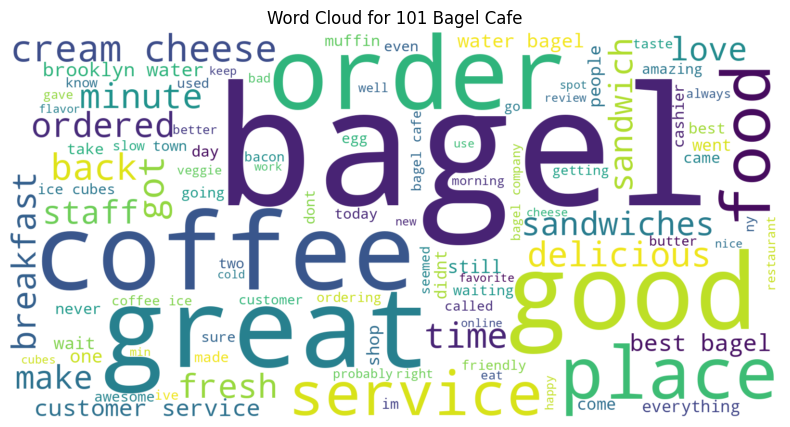

In [19]:
def create_word_cloud(text):
    wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, background_color='white')
    wordcloud.generate(text)
    return wordcloud

def get_wordcloud_by_biz(biz_name):
    text = df_by_biz.loc[df_by_biz['restaurant_name'] == biz_name, 'text_processed'].iloc[0]
    wordcloud = create_word_cloud(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {biz_name}")
    plt.axis('off')
    plt.show()

# print(df_combined_by_biz.loc[df_combined_by_biz['name_y'] == "101 Bagel Cafe", 'text_processed'].shape)
get_wordcloud_by_biz("101 Bagel Cafe")

In [20]:
df_by_biz.to_csv('atlanta_biz_data.csv', index=False)
from google.colab import files
files.download('atlanta_biz_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
selected_columns = ['name_x', 'time', 'normalized_weighted_rating', 'text', 'name_y']
df_selected = df_reviews[selected_columns]
df_selected.rename(columns={'name_x': 'reviewer_name'}, inplace=True)
df_selected.rename(columns={'name_y': 'restaurant_name'}, inplace=True)
df_selected.head()

<ipython-input-23-21a358e6f67e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'name_x': 'reviewer_name'}, inplace=True)
<ipython-input-23-21a358e6f67e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'name_y': 'restaurant_name'}, inplace=True)


,reviewer_name,time,normalized_weighted_rating,text,restaurant_name
0,Liema Hayes,1625931369083,5.0,Anytime I am downtown I have to get me some sp...,Noodle Cafe
1,Evan Guthrie,1614374734371,5.0,Noodle Cafe at Peachtree Center in Atlanta is ...,Noodle Cafe
2,Jerome Narain,1612374257054,2.0,Updated Menu per Covid-19.,Noodle Cafe
3,osheona r,1571850144379,2.0,Food used to be much better. I came in today a...,Noodle Cafe
4,Matthew Wamboldt,1596820182685,4.0,"Timely service and decent, affordable Thai/Chi...",Noodle Cafe


In [35]:
filtered_rows = df_selected[df_selected['restaurant_name'] == "\"Food That Pleases\""]
filtered_rows.head()

,reviewer_name,time,normalized_weighted_rating,text,restaurant_name
3586,Marco Ciavolino,1604833687379,5.0,Absolutely amazing local diner with an iconic ...,"""Food That Pleases"""
3587,Robert Bowers,1534095202131,3.0,This is your typical greasy spoon. The prices...,"""Food That Pleases"""
3588,Will Dockery,1536169770425,3.0,"The iconic Majestic Diner, since 1929...","""Food That Pleases"""
3589,Kyle Litman,1530640329840,0.0,Bad food,"""Food That Pleases"""


In [24]:
df_selected.shape

(672176, 5)

In [26]:
rating_counts = df_selected.groupby(['restaurant_name', 'normalized_weighted_rating']).size().reset_index(name='counts')
rating_counts.head()

,restaurant_name,normalized_weighted_rating,counts
0,"""Food That Pleases""",0.0,1
1,"""Food That Pleases""",3.0,2
2,"""Food That Pleases""",5.0,1
3,101 Bagel Cafe,0.0,25
4,101 Bagel Cafe,1.0,7


In [27]:
total_counts = rating_counts.groupby('restaurant_name')['counts'].transform('sum')
total_counts.head()

0      4
1      4
2      4
3    200
4    200
Name: counts, dtype: int64

In [28]:
rating_counts['percentage'] = (rating_counts['counts'] / total_counts) * 100
rating_counts.head()

,restaurant_name,normalized_weighted_rating,counts,percentage
0,"""Food That Pleases""",0.0,1,25.0
1,"""Food That Pleases""",3.0,2,50.0
2,"""Food That Pleases""",5.0,1,25.0
3,101 Bagel Cafe,0.0,25,12.5
4,101 Bagel Cafe,1.0,7,3.5


In [30]:
pivot_table = rating_counts.pivot(index='restaurant_name', columns='normalized_weighted_rating', values='percentage')
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.round(1)
pivot_table.head()

normalized_weighted_rating,0.0,1.0,2.0,3.0,4.0,5.0
restaurant_name,,,,,,
"""Food That Pleases""",25.0,0.0,0.0,50.0,0.0,25.0
101 Bagel Cafe,12.5,3.5,9.0,16.0,47.0,12.0
1911 Biscuits & Burgers,3.3,1.6,6.5,0.0,10.6,78.0
224 Cafe,25.0,0.0,0.0,4.2,50.0,20.8
26 Thai Kitchen and Bar Midtown,2.1,1.6,2.1,7.5,38.5,48.1


In [36]:
pivot_table.shape

(1048, 6)

In [37]:
pivot_table.to_csv('atlanta_biz_rating_percent_data.csv', index=True)
from google.colab import files
files.download('atlanta_biz_rating_percent_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>